# Descriptive Statistics Example


$\frac{20 + 10 + 18}{3} = 16$

Denote the mean of X with $\mu$

$\mu = \frac{\sum_{i=1}^{n} X_i}{n}$

where X is any dataset of `n` many items:<br>
$X = \{x_1, x_2, ..., x_n\}$


$\frac{20 + 10 + 18 + 120}{3} = 56$

- Sort your data in ascending or descending order
- For a data set of size `n` if:
    - `n` is odd:
        - The sample in the very middle is the `median`
    - `n` is even:
        - The `mean` of the 2 samples in the very middle is the `median`

- Sort the dataset:
    - $\{10, 18, 20, 120\}$
- `n` = 4, so take the mean of the 2 middle samples:
    - $\frac{18 + 20}{2} = 19 =$ `median`

The mode of $X = \{10, 18, 20, 120, 18\}$ is $18$


Denote the variance of X with $\sigma^2$<br>

where $X = \{x_1, x_2, ..., x_n\}$

$ \sigma^2 =  \frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n - 1}$

$X = \{10, 18, 20, 120, 18\}$

$ \mu(X) = 37.2 $

$ \sigma^2 =  \frac{(10 - 37.2)^2 + (18 - 37.2)^2 + (20 - 37.2)^2 + (120 - 37.2)^2 + (18 - 37.2)^2}{5 - 1} = 2157.2$

$ \sigma = \sqrt{\sigma^2} = \sqrt{2157.2} = 46.44$

$Range(X) = max(X) - min(X)$

So, when $X = \{10, 18, 20, 120, 18\}$,<br>

$Range(X) = 120 - 10 = 110$

$ IQR = Q_3 - Q_1 $

w/ sorted $X = \{10, 18, 18, 20, 120\}$, 

$Q_1 = \frac{10 + 18}{2} = 14$<br>
$Q_2 = 18$<br>
$Q_3 = \frac{20 + 120}{2} = 70$<br>

So, $IQR(X) = 70 -14 = 56$

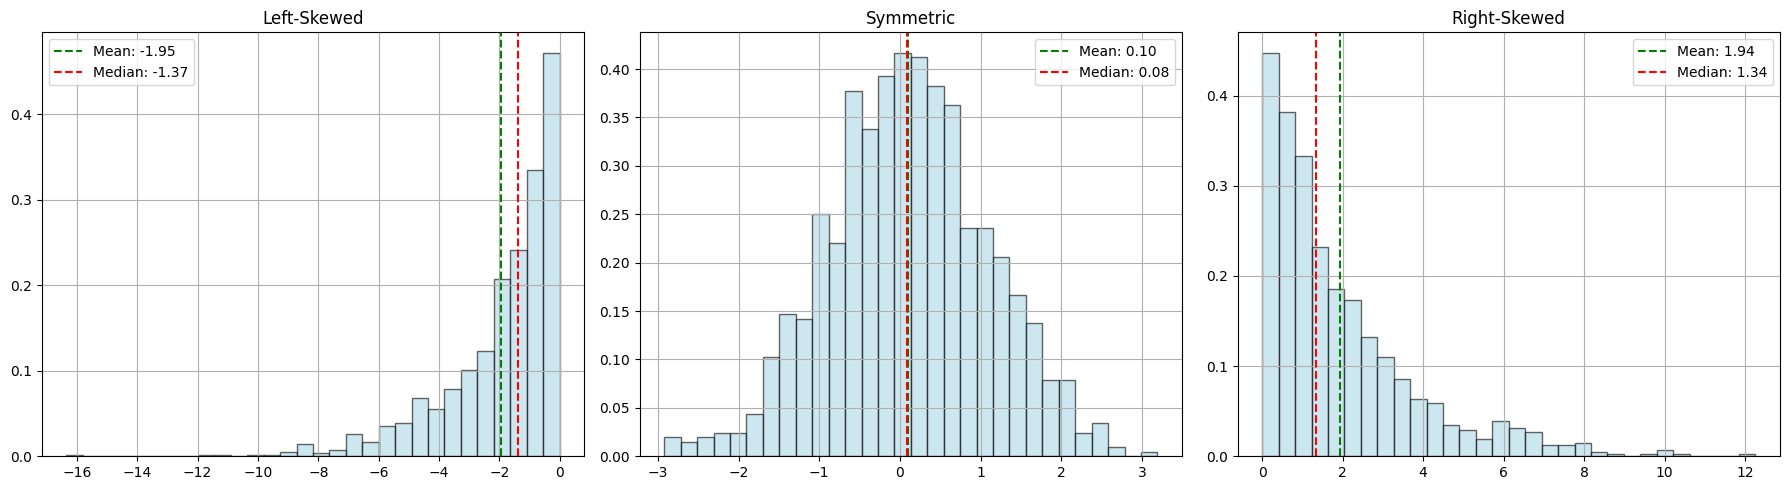

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.stats import skewnorm

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Left-Skewed', 'Symmetric', 'Right-Skewed']

# Define distributions
np.random.seed(42)

# Left-skewed: Flip a right-skewed distribution
left_skewed = -np.random.exponential(scale=2, size=1000)
# Symmetric: Normal distribution
symmetric = np.random.normal(loc=0, scale=1, size=1000)
# Right-skewed: Exponential distribution
right_skewed = np.random.exponential(scale=2, size=1000)

datasets = [left_skewed, symmetric, right_skewed]

# Plotting loop
for ax, data, title in zip(axes, datasets, titles):
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    ax.hist(data, bins=30, density=True, alpha=0.6, color='lightblue', edgecolor='black')
    ax.axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}')
    
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


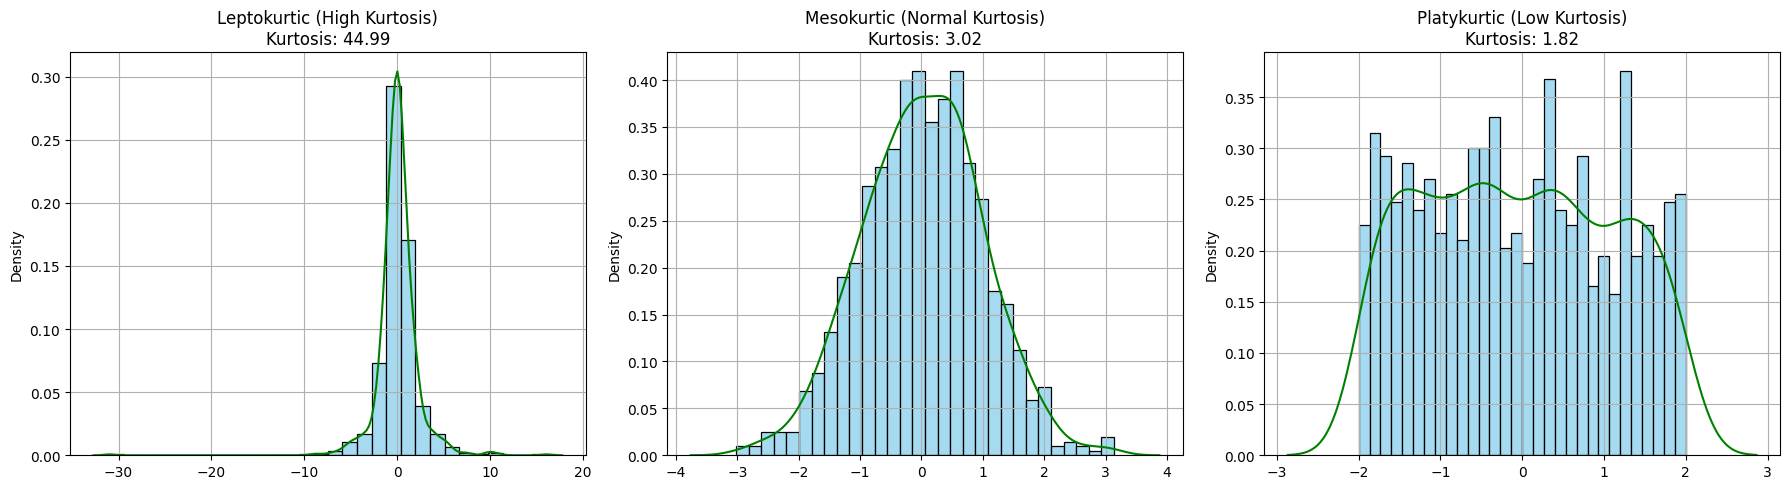

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, uniform, kurtosis
import seaborn as sns

# Set up figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Leptokurtic (High Kurtosis)', 'Mesokurtic (Normal Kurtosis)', 'Platykurtic (Low Kurtosis)']

# Generate data
np.random.seed(42)
leptokurtic = t.rvs(df=2, size=1000)          # High kurtosis
mesokurtic = norm.rvs(loc=0, scale=1, size=1000)  # Normal kurtosis
platykurtic = uniform.rvs(loc=-2, scale=4, size=1000)  # Low kurtosis

datasets = [leptokurtic, mesokurtic, platykurtic]

# Plot loop
for ax, data, title in zip(axes, datasets, titles):
    sns.histplot(data, bins=30, kde=False, line_kws={"color":"red"},stat='density', color='skyblue', edgecolor='black', ax=ax)
    sns.kdeplot(data, color='green', label='KDE', ax=ax)
    k = kurtosis(data, fisher=False)
    ax.set_title(f"{title}\nKurtosis: {k:.2f}")
    ax.grid(True)

plt.tight_layout()
plt.show()
